In [405]:
# IMPORT 
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns


# Import libraries
%matplotlib inline
import matplotlib.image as mplib

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from tensorflow.keras import backend as K
from scipy.linalg import eigh
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from time import time

In [406]:
#load data
faces = pd.read_csv('./face_data.csv')
faces.shape

(400, 4097)

In [407]:
##Helper functions. 
def show_orignal_images(pixels):
    #Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

def show_eigenfaces(pca):
    #Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()


# targets = faces["target"]
# pixels = faces.drop(["target"],axis=1)
X = faces.drop('target',axis = 1)
y = faces['target']

print (np.array(pixels).shape)

(400, 4096)


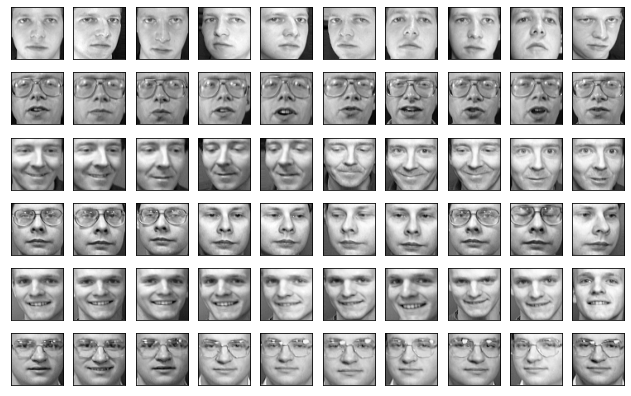

In [408]:
show_orignal_images(pixels)

In [409]:
# Pandas DataFrame describe() method is used to calculate some statistical data such as percentile, 
# mean and std of different numerical values of the DataFrame.
faces.describe()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455,19.500000
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635,11.557853
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058,0.000000
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521,9.750000
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669422,0.683884,0.702479,...,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727,19.500000
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355,29.250000
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314,39.000000


In [410]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

In [411]:
pca=PCA(n_components=155)
pca_values=pca.fit_transform(faces)
var = pca.explained_variance_ratio_
pca.components_[0]
# How compressed data is distributed.
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([65.27, 72.06, 77.04, 80.  , 81.85, 83.17, 84.34, 85.23, 85.99,
       86.7 , 87.32, 87.91, 88.44, 88.9 , 89.32, 89.71, 90.07, 90.41,
       90.71, 90.99, 91.27, 91.52, 91.75, 91.96, 92.17, 92.37, 92.57,
       92.76, 92.94, 93.1 , 93.26, 93.41, 93.55, 93.68, 93.8 , 93.92,
       94.04, 94.15, 94.26, 94.36, 94.46, 94.56, 94.65, 94.74, 94.83,
       94.92, 95.  , 95.08, 95.16, 95.24, 95.31, 95.38, 95.45, 95.52,
       95.59, 95.66, 95.72, 95.78, 95.84, 95.9 , 95.96, 96.02, 96.08,
       96.14, 96.19, 96.24, 96.29, 96.34, 96.39, 96.44, 96.49, 96.54,
       96.59, 96.64, 96.68, 96.72, 96.76, 96.8 , 96.84, 96.88, 96.92,
       96.96, 97.  , 97.04, 97.08, 97.12, 97.16, 97.2 , 97.23, 97.26,
       97.29, 97.32, 97.35, 97.38, 97.41, 97.44, 97.47, 97.5 , 97.53,
       97.56, 97.59, 97.62, 97.65, 97.68, 97.71, 97.74, 97.77, 97.8 ,
       97.83, 97.85, 97.87, 97.89, 97.91, 97.93, 97.95, 97.97, 97.99,
       98.01, 98.03, 98.05, 98.07, 98.09, 98.11, 98.13, 98.15, 98.17,
       98.19, 98.21,

Text(0, 0.5, 'Cumulative explained variance')

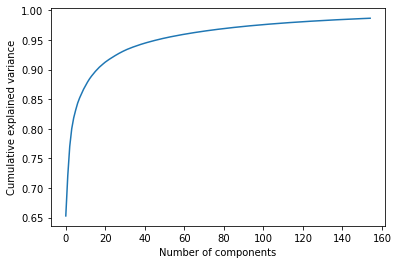

In [412]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axis("tight")
# plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
# plt.savefig("pca_cumulative_variance.png")

In [413]:
# display eigenfaces
# show_eigenfaces(pca) only works with X_train in pca instead of faces

In [414]:
z =pca_values[: 40]
new_df = pd.DataFrame(z, columns=["F"+str(i+1) for i in range(var1.shape[-1])])
new_df
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(new_df)
kmeans.labels_

array([0, 2, 0, 4, 2, 4, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2])

In [415]:
new_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F146,F147,F148,F149,F150,F151,F152,F153,F154,F155
0,20.424610,2.393748,-0.523736,-1.455852,1.057961,2.492350,-0.832615,-2.330733,-2.771524,0.391567,...,0.032169,0.380680,-0.046124,-0.101774,0.122139,-0.221969,-0.087773,0.133322,-0.101107,0.186619
1,19.691297,-4.444976,-4.783496,1.797160,4.800931,0.576344,-1.892396,1.123576,-1.911319,1.085750,...,0.019583,-0.194189,0.212879,-0.221248,0.218224,0.289459,-0.170982,-0.173306,-0.438626,0.237854
2,20.264880,1.035820,-0.996158,0.194545,0.852069,2.531288,-1.599510,-2.692934,-2.834861,1.453241,...,-0.063529,-0.041427,0.053184,0.178140,-0.097341,0.009082,0.272067,-0.113554,0.030697,-0.038139
3,19.508386,3.630074,11.585464,0.015905,-0.644984,0.941740,-1.012269,0.766873,-0.309725,-0.055174,...,-0.110860,-0.056187,-0.063468,0.192972,0.133491,0.039467,-0.147720,0.049179,0.199033,-0.189917
4,20.104069,-0.775496,-2.267189,3.614057,3.267762,2.681866,-1.775416,0.895234,-0.987041,1.155934,...,-0.050532,-0.431606,-0.027285,-0.188257,-0.071976,0.056643,-0.464083,-0.510488,-0.047036,-0.067478


In [416]:
faces = new_df
faces.rename(columns={'F1':'label'}, inplace=True) # inplace=true is to delete it permanetly and has been depricated
faces.rename(columns={'F155':'target'}, inplace=True)

In [417]:
faces.head()

,label,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F146,F147,F148,F149,F150,F151,F152,F153,F154,target
0,20.424610,2.393748,-0.523736,-1.455852,1.057961,2.492350,-0.832615,-2.330733,-2.771524,0.391567,...,0.032169,0.380680,-0.046124,-0.101774,0.122139,-0.221969,-0.087773,0.133322,-0.101107,0.186619
1,19.691297,-4.444976,-4.783496,1.797160,4.800931,0.576344,-1.892396,1.123576,-1.911319,1.085750,...,0.019583,-0.194189,0.212879,-0.221248,0.218224,0.289459,-0.170982,-0.173306,-0.438626,0.237854
2,20.264880,1.035820,-0.996158,0.194545,0.852069,2.531288,-1.599510,-2.692934,-2.834861,1.453241,...,-0.063529,-0.041427,0.053184,0.178140,-0.097341,0.009082,0.272067,-0.113554,0.030697,-0.038139
3,19.508386,3.630074,11.585464,0.015905,-0.644984,0.941740,-1.012269,0.766873,-0.309725,-0.055174,...,-0.110860,-0.056187,-0.063468,0.192972,0.133491,0.039467,-0.147720,0.049179,0.199033,-0.189917
4,20.104069,-0.775496,-2.267189,3.614057,3.267762,2.681866,-1.775416,0.895234,-0.987041,1.155934,...,-0.050532,-0.431606,-0.027285,-0.188257,-0.071976,0.056643,-0.464083,-0.510488,-0.047036,-0.067478


In [418]:
# X = pixels #faces.drop('target',axis = 1)
# y = targets #faces['target']
# # X_test = X

In [419]:
# split data
# (X_train, X_test, Y_train, Y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

In [420]:
from sklearn.preprocessing import MinMaxScaler
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)
# X_train.copy()

MinMaxScaler()

In [421]:
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)
X_train.shape, Y_train.shape, X_test.shape

((320, 4096), (320,), (80, 4096))

In [422]:
X_train = X_train.reshape((X_train.shape[0], 64, 64, 1)).astype('float32') #22, 7, 1
X_test = X_test.reshape((X_test.shape[0], 64, 64, 1)).astype('float32')

In [423]:
print(X_train.shape)

(320, 64, 64, 1)


In [424]:
Y_train = to_categorical(Y_train, 40)
Y_test = to_categorical(Y_test, 40)
Y_train.shape, Y_test.shape

((320, 40), (80, 40))

In [425]:
num_classes = Y_test.shape[1]
num_classes

40

In [426]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D((2,2),strides=(2,2), padding='same'))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# print model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 128)     

In [427]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=90, batch_size=256, verbose=2)

Epoch 1/90
2/2 - 1s - loss: 3.6896 - accuracy: 0.0250 - val_loss: 3.6974 - val_accuracy: 0.0125
Epoch 2/90
2/2 - 1s - loss: 3.6748 - accuracy: 0.0250 - val_loss: 3.7028 - val_accuracy: 0.0000e+00
Epoch 3/90
2/2 - 1s - loss: 3.6644 - accuracy: 0.0437 - val_loss: 3.7095 - val_accuracy: 0.0000e+00
Epoch 4/90
2/2 - 1s - loss: 3.6543 - accuracy: 0.0344 - val_loss: 3.7141 - val_accuracy: 0.0000e+00
Epoch 5/90
2/2 - 1s - loss: 3.6421 - accuracy: 0.0312 - val_loss: 3.7175 - val_accuracy: 0.0125
Epoch 6/90
2/2 - 1s - loss: 3.6275 - accuracy: 0.0500 - val_loss: 3.7167 - val_accuracy: 0.0250
Epoch 7/90
2/2 - 1s - loss: 3.6111 - accuracy: 0.0531 - val_loss: 3.7094 - val_accuracy: 0.0500
Epoch 8/90
2/2 - 1s - loss: 3.5899 - accuracy: 0.0844 - val_loss: 3.7056 - val_accuracy: 0.0625
Epoch 9/90
2/2 - 1s - loss: 3.5661 - accuracy: 0.1500 - val_loss: 3.6995 - val_accuracy: 0.0750
Epoch 10/90
2/2 - 1s - loss: 3.5362 - accuracy: 0.1375 - val_loss: 3.6873 - val_accuracy: 0.0750
Epoch 11/90
2/2 - 1s - loss

In [428]:
# Final evaluation of the model
scores = model.evaluate(X_test,Y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.25%


In [429]:
print("Loss of the model is - " , model.evaluate(X_test,Y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,Y_test)[1]*100 , "%")

3/3 [==============================] - 0s 53ms/step - loss: 0.2170 - accuracy: 0.9875
Loss of the model is -  0.2169918566942215
3/3 [==============================] - 0s 55ms/step - loss: 0.2170 - accuracy: 0.9875
Accuracy of the model is -  98.7500011920929 %


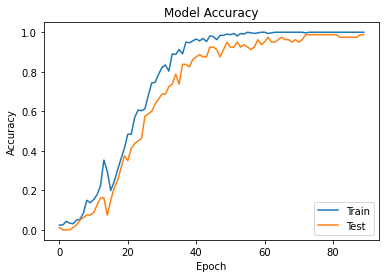

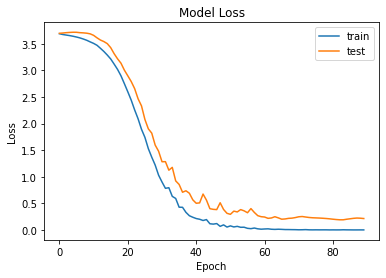

In [430]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('Model_loss.png')
plt.show()

In [431]:
model.save('weights.model')
model.save_weights("model.h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


INFO:tensorflow:Assets written to: weights.model\assets


In [432]:
Y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [433]:
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

28

In [434]:
rounded_predictions = model.predict_classes(X_test, batch_size=256, verbose=0)
rounded_predictions[1]

28

In [435]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

In [442]:
# X_test[1]

In [441]:
X_test =np.argmax(X_test, axis=1)
# X_test[1]

In [443]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print(precision_score(rounded_labels, rounded_predictions , average="macro"))
print(recall_score(rounded_labels, rounded_predictions , average="macro"))
print(f1_score(rounded_labels, rounded_predictions , average="macro"))

0.9907407407407407
0.9953703703703705
0.991919191919192


In [444]:
print(classification_report(rounded_labels, rounded_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00    